In [12]:
import random
# 이로일나
# 08-12
# 1, 6, 17, 22, 24, 35
#
# 그룹 정의

# 이웃수
a_group = [1, 3, 4, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 21, 22, 24, 25, 26, 27 29, 30]
# 이웃수 제외한 나머지
b_group = [x for x in range(1, 46) if x not in a_group]
# 인터넷
c_group = [1, 2, 6, 7, 8, 10, 12, 13, 14, 16, 17, 19, 21, 26, 27, 28, 29, 31, 32, 33, 37, 38, 39, 40, 42]

# 조건을 만족하는 6개 숫자 찾기
while True:
    # # a_group과 b_group에서 각각 2~4개 선택
    a_count = random.randint(1, 2)  # a_group에서 선택할 개수 (2~4개)
    b_count = 6 - a_count           # b_group에서 선택할 개수 (6에서 a_count를 뺀 값, 2~4개)

    # a와 b에서 3개씩 선택
    # a_count = 1  # a_group에서 3개 숫자 선택
    # b_count = 5  # b_group에서 3개 숫자 선택

    # a_group과 b_group에서 각각 숫자 선택
    selected_a = random.sample(a_group, a_count)
    selected_b = random.sample(b_group, b_count)

    # 최종 6개의 숫자
    selected_numbers = selected_a + selected_b

    # 선택된 숫자 중 c_group에 속하는 숫자 확인
    selected_c = [num for num in selected_numbers if num in c_group]
    c_count = len(selected_c)

    # 홀수와 짝수의 개수 확인
    odd_count = sum(1 for num in selected_numbers if num % 2 != 0)
    even_count = 6 - odd_count

    # 조건을 만족하면 출력 후 종료
    if 2 <= c_count <= 3:
    #if c_count == 1 or c_count == 2:
        print("선택된 숫자들:", sorted(selected_numbers))
        print(f"이웃수에서 선택된 숫자: {selected_a}")
        print(f"인터넷에서 선택된 숫자: {selected_c} (총 {c_count}개)")
        print(f"이웃수제외에서 선택된 숫자: {selected_b}")
        print(f"홀수 개수: {odd_count}, 짝수 개수: {even_count}")
        break


선택된 숫자들: [18, 25, 32, 39, 41, 45]
이웃수에서 선택된 숫자: [18]
인터넷에서 선택된 숫자: [39, 41, 45] (총 3개)
이웃수제외에서 선택된 숫자: [25, 32, 39, 41, 45]
홀수 개수: 4, 짝수 개수: 2


In [13]:
import random


# 🎯 이전 회차 당첨 번호 (수정 가능)
prev_winning_nums = [2, 8, 13, 16, 23, 28]

# A그룹: 이웃수 ±2
a_group = set()
for n in prev_winning_nums:
    for offset in [-2, -1, 1, 2]:
        val = n + offset
        if 1 <= val <= 45:
            a_group.add(val)
a_group = sorted(a_group)

# C그룹: 온라인 추천 번호
c_group = [1, 2, 6, 7, 8, 10, 12, 13, 14, 16, 17, 19, 21, 26, 27, 28, 29, 31, 32, 33, 37, 38, 39, 40, 42]

# B그룹: 1~45에서 A그룹만 제외 (C그룹 포함 가능)
all_nums = set(range(1, 46))
b_group = sorted(all_nums - set(a_group))

# ✅ 조건을 만족하는 조합 1세트 생성 함수
def generate_lotto_set():
    for _ in range(1000):  # 조건 만족할 때까지 최대 1000회 시도
        a_count = random.randint(2, 4)
        a_pick = random.sample(a_group, a_count)
        b_pick = random.sample(b_group, 6 - a_count)
        candidate = sorted(a_pick + b_pick)

        # C그룹 포함 여부 확인
        c_included = [n for n in candidate if n in c_group]
        if 3 <= len(c_included) <= 4:
            return candidate, c_included
    return None, None

# ✅ 결과 출력 (1세트만)
lotto_set, c_included_nums = generate_lotto_set()
if lotto_set:
    print("🎯 조건에 맞는 로또 번호:", lotto_set)
    print(f"🔍 C그룹 숫자 포함 수: {len(c_included_nums)}개 -> {c_included_nums}")

    # A, B, C 그룹 각각에서 포함된 숫자 확인
    a_included = [n for n in lotto_set if n in a_group]
    b_included = [n for n in lotto_set if n in b_group]
    c_included = [n for n in lotto_set if n in c_group]

    print(f"🟦 이웃수 번호: {a_included}")
    print(f"🟥 인터넷 번호: {c_included}")
    print(f"🟨 이웃수 제외 번호: {b_included}")
else:
    print("❌ 조건을 만족하는 조합을 찾지 못했습니다.")


🎯 조건에 맞는 로또 번호: [11, 17, 24, 29, 39, 42]
🔍 C그룹 숫자 포함 수: 3개 -> [17, 39, 42]
🟦 이웃수 번호: [24, 29]
🟥 인터넷 번호: [17, 39, 42]
🟨 이웃수 제외 번호: [11, 17, 39, 42]


In [21]:
import random
from collections import Counter, defaultdict

# 로또 번호 생성 함수
def generate_lotto_numbers():
    return tuple(sorted(random.sample(range(1, 46), 6)))

# 전체 시뮬레이션 수
N = 50_000_000
BATCH = 5_000_000  # 500만 단위로 나눠서 반복

results = Counter()

print("🚀 시뮬레이션 시작...")

for i in range(N // BATCH):
    batch = [generate_lotto_numbers() for _ in range(BATCH)]
    results += Counter(batch)
    print(f"🔁 {i+1}차 배치 완료")

# 3~10회 등장한 조합만 필터링
filtered = [k for k, v in results.items() if 1 <= v <= 3]

if filtered:
    print("\n📖 조건 만족 조합 수:", len(filtered))

    # 🎯 무작위 추천 번호 출력
    selected = random.choice(filtered)
    print(f"추천 번호 :🎯 {selected}🎯 ")
    print(f"🔎 이 조합은 총 {results[selected]}회 등장했습니다.")

    # 📊 등장 횟수별 조합 수 세기
    freq_dist = defaultdict(int)
    for combo in filtered:
        freq = results[combo]
        freq_dist[freq] += 1

    # 결과 출력
    print("\n📊 [등장 횟수별 조합 수]")
    for freq in sorted(freq_dist):
        print(f"{freq}회 등장한 조합 수: {freq_dist[freq]}개")
else:
    print("⚠️ 조건을 만족하는 번호 조합 없음. N을 더 늘리세요.")


🚀 시뮬레이션 시작...
🔁 1차 배치 완료
🔁 2차 배치 완료
🔁 3차 배치 완료
🔁 4차 배치 완료
🔁 5차 배치 완료
🔁 6차 배치 완료
🔁 7차 배치 완료
🔁 8차 배치 완료
🔁 9차 배치 완료
🔁 10차 배치 완료

📖 조건 만족 조합 수: 1117102
추천 번호 :🎯 (2, 19, 25, 27, 35, 39)🎯 
🔎 이 조합은 총 2회 등장했습니다.

📊 [등장 횟수별 조합 수]
1회 등장한 조합 수: 107808개
2회 등장한 조합 수: 331106개
3회 등장한 조합 수: 678188개


In [ ]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get -qq install -y fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# ✅ 기본 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지


/tmp/ipython-input-3548456970.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="mako")
/tmp/ipython-input-3548456970.py:20: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3548456970.py:20: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3548456970.py:20: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3548456970.py:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3548456970.py:20: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-354

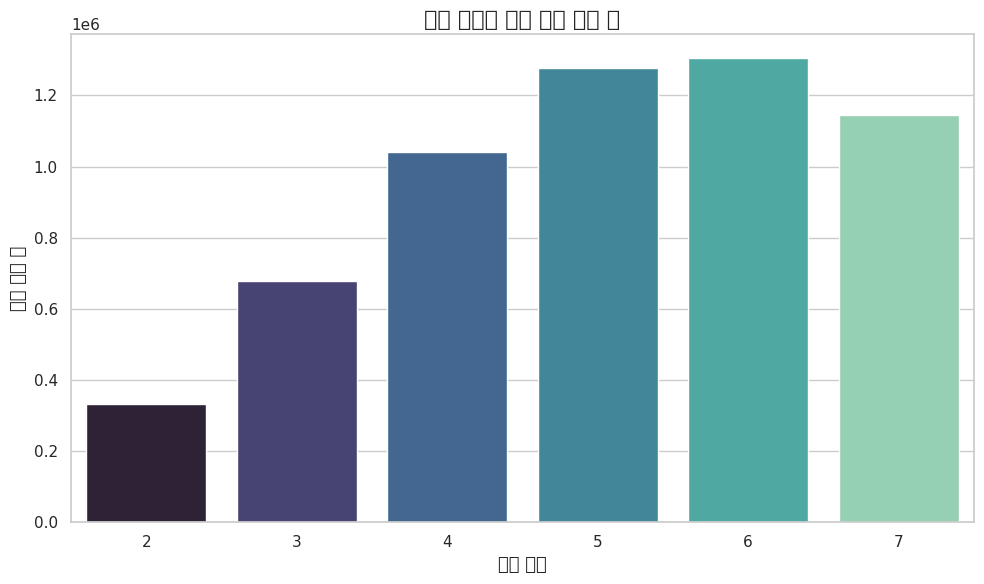

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 등장 횟수와 해당 조합 수 리스트 생성 (자동으로 x축과 y축 설정)
x = sorted(freq_dist.keys())         # 등장 횟수 (1~10 사이일 가능성 있음)
y = [freq_dist[f] for f in x]        # 각 등장 횟수에 해당하는 조합 수

# 그래프 출력
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, palette="mako")

plt.title("등장 횟수별 로또 번호 조합 수", fontsize=16)
plt.xlabel("등장 횟수", fontsize=13)
plt.ylabel("해당 조합 수", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()
